# Glumpy (240Hz, fullscreen, pixel [5,5], 50 iterations)
Frameworks
- qt (keine Ergebnisse bei C pixel reader)
- pyglet (keine Ergebnisse bei C pixel reader)
- glfw (keine Ergebnisse bei C pixel reader)
- sdl/pygame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
PATH = "../../data/glumpy/glumpy_291123_55_240hz"

In [3]:
files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]
files

['glumpy_glfw_default_False_bitblt_3f2213de-2cad-42b7-ba0e-dfbf5fe8cbb4.csv',
 'glumpy_glfw_default_False_getdbits_a0716fae-d197-4b9f-bf91-ff815971fe9e.csv',
 'glumpy_glfw_default_False_getpixel_69225fce-e7f2-4cb4-9732-071fa4d73609.csv',
 'glumpy_glfw_default_False_windup_python_19aeeaca-db86-4f5d-8b4b-a5267f608d67.csv',
 'glumpy_glfw_default_True_bitblt_09957609-7f5e-40f3-8b2b-0a219a63881d.csv',
 'glumpy_glfw_default_True_getdbits_461a9ea0-c1b6-4871-8d19-a14cde5510d0.csv',
 'glumpy_glfw_default_True_getpixel_3372045d-2240-4f4b-b30b-9c442071ffb7.csv',
 'glumpy_glfw_default_True_windup_python_cbc098e5-6096-4e04-9720-a73025ce6f2e.csv',
 'glumpy_glfw_rects_False_bitblt_27f37983-c32f-47c4-b7ca-fcb83ce2dfa8.csv',
 'glumpy_glfw_rects_False_getdbits_a121f4e2-4d24-4485-8334-c31fa7872b7a.csv',
 'glumpy_glfw_rects_False_getpixel_695a3b45-1dba-4be1-bd83-49c3db303bcf.csv',
 'glumpy_glfw_rects_False_windup_python_f090aa92-e210-4cb6-824a-6a49ec35b3ad.csv',
 'glumpy_glfw_rects_True_bitblt_05330077-2a

In [4]:
dataframes = []
for file in files:
    dataframes.append(pd.read_csv(f"{PATH}/{file}"))
data_raw = pd.concat(dataframes)

In [5]:
# clean because windup not working with opengl based
# df.loc[~((df['col1'] == 'A') & (df['col2'] > 6))] 
data_clean = data_raw.loc[~((data_raw['fw_running'] == True) & (data_raw['fw'] == -1))]
data = data_clean

## End-to-end latencies with and without running framework tester
### Complexity: Default

Almost the same -> no additional latency with framework tester

C:\Users\tina\AppData\Local\Temp\ipykernel_3256\3308236901.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running', dodge=True, color='black')


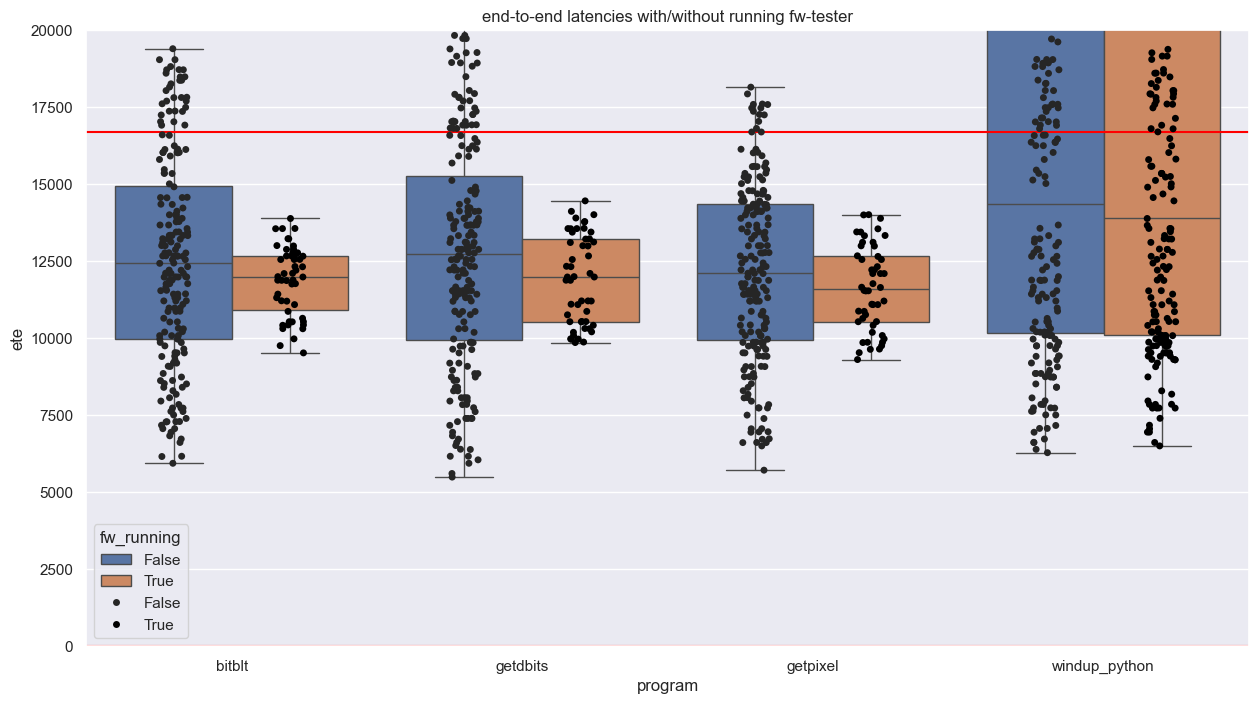

In [6]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.boxplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running').set_title('end-to-end latencies with/without running fw-tester')
sns.stripplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(0, 20000)
for i in range(0, 20):
    plt.axhline(i*16.7*1000, color='red')

### Complexity: Rects

Also, no additional latency (even faster with running framework tester)

C:\Users\tina\AppData\Local\Temp\ipykernel_3256\2271949248.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running', dodge=True, color='black')


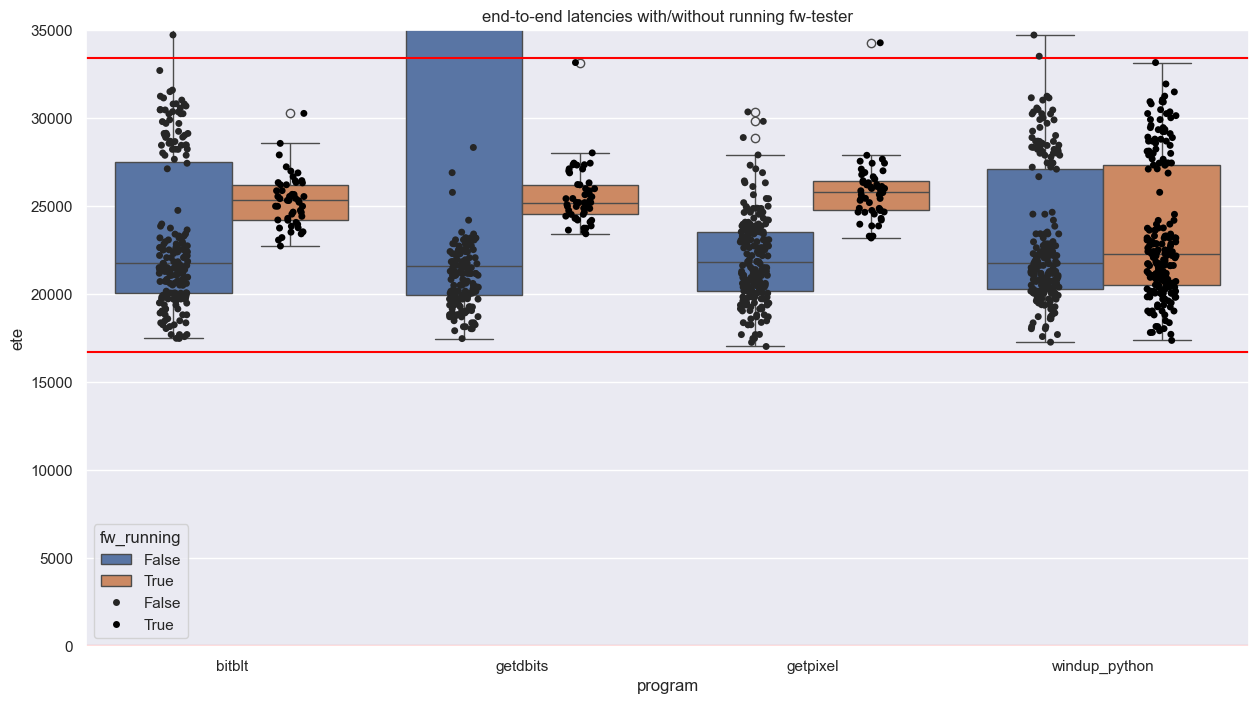

In [7]:
sns.boxplot(data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running').set_title('end-to-end latencies with/without running fw-tester')
sns.stripplot(data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(0, 35000)
for i in range(0, 20):
    plt.axhline(i*16.7*1000, color='red')

## Framework latency by framework
### Complexity: Default

no results for pyqt5 and wxpython because of border

C:\Users\tina\AppData\Local\Temp\ipykernel_3256\1753498729.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['complexity'] == 'default') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True, color='black')


(-1000.0, 25000.0)

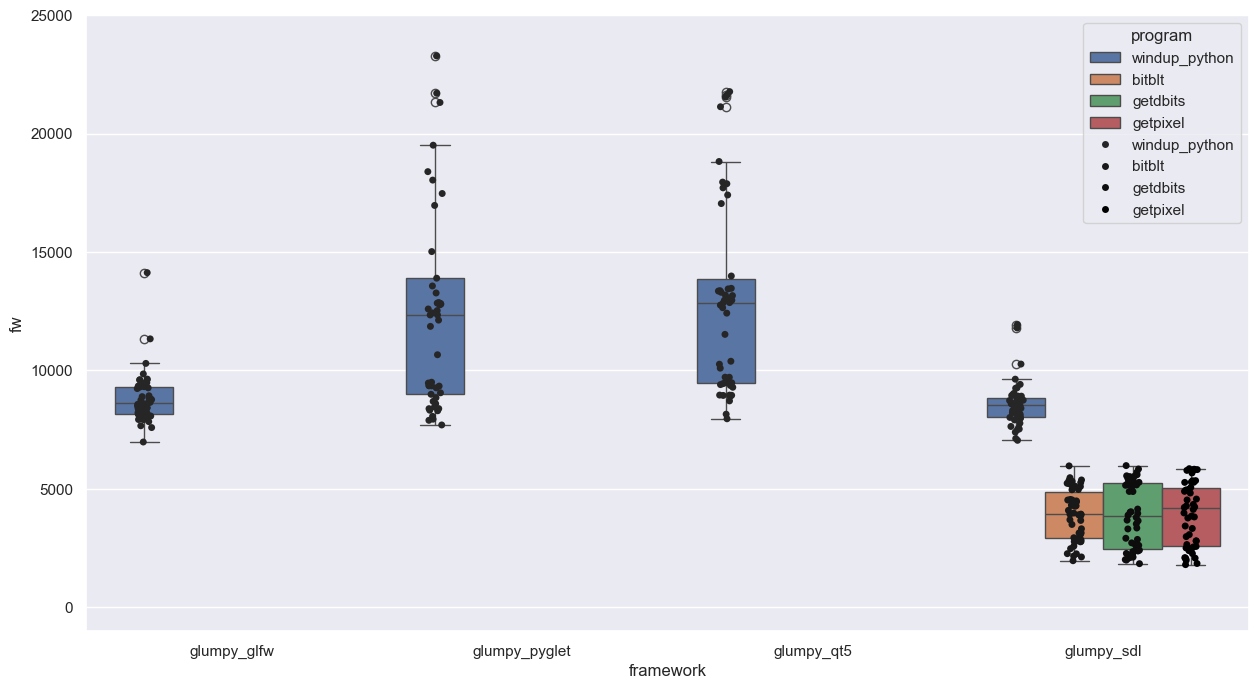

In [8]:
sns.boxplot(data=data[((data['complexity'] == 'default') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['complexity'] == 'default') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-1000, 25000)

### Complexity: Rects

C:\Users\tina\AppData\Local\Temp\ipykernel_3256\1174379519.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['complexity'] == 'rects') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True, color='black')


(-1000.0, 40000.0)

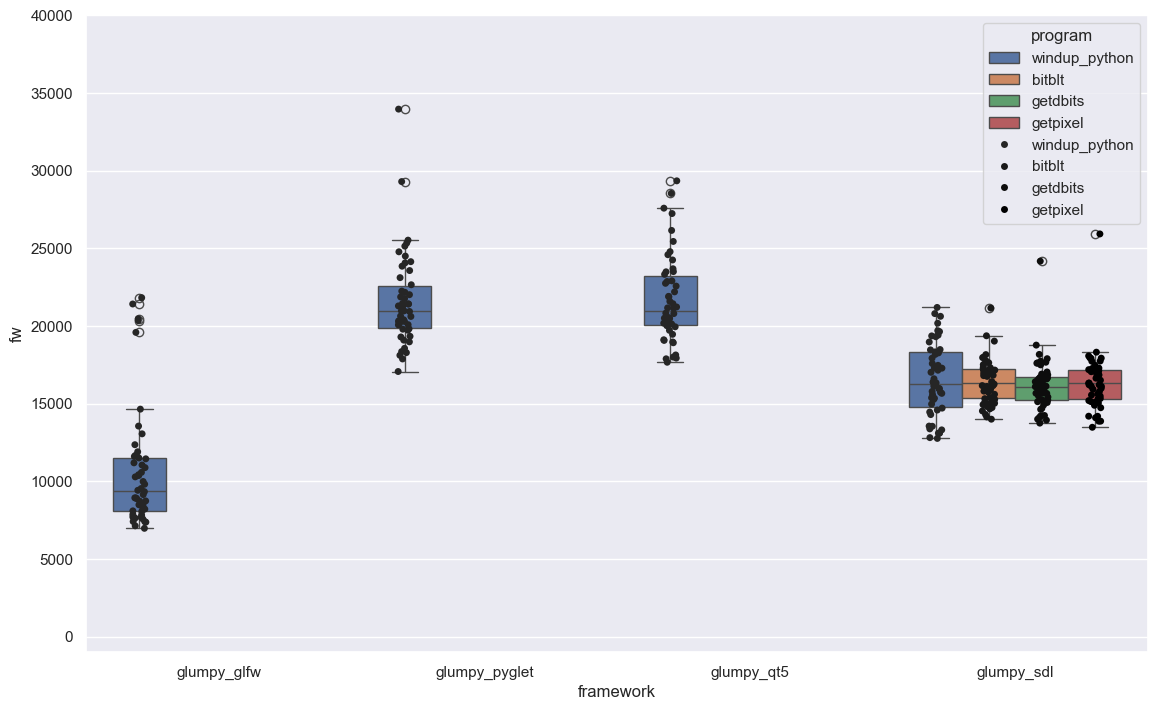

In [16]:
sns.boxplot(data=data[((data['complexity'] == 'rects') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['complexity'] == 'rects') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-1000, 40000)

### Framework latency by complexity

C:\Users\tina\AppData\Local\Temp\ipykernel_3256\252265620.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['fw_running'] == True], x='complexity', y='fw', hue='program_fwrunning', dodge=True, color='black')


<Axes: xlabel='complexity', ylabel='fw'>

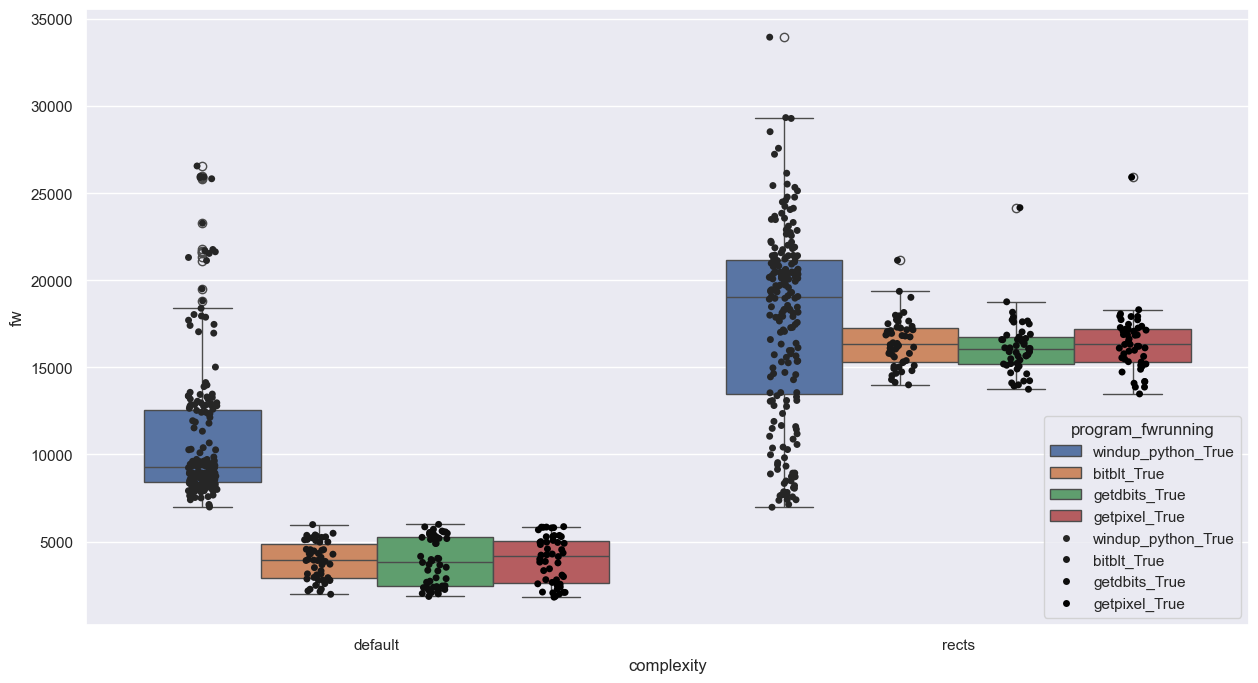

In [10]:
sns.boxplot(data=data[data['fw_running'] == True], x='complexity', y='fw', hue='program_fwrunning', dodge=True).set_title('')
sns.stripplot(data=data[data['fw_running'] == True], x='complexity', y='fw', hue='program_fwrunning', dodge=True, color='black')

### Framework latency by framework

C:\Users\tina\AppData\Local\Temp\ipykernel_3256\2248004208.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#000000'` for the same effect.

  sns.stripplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='framework_complexity', dodge=True, color=(0,0,0))


<Axes: xlabel='framework', ylabel='fw'>

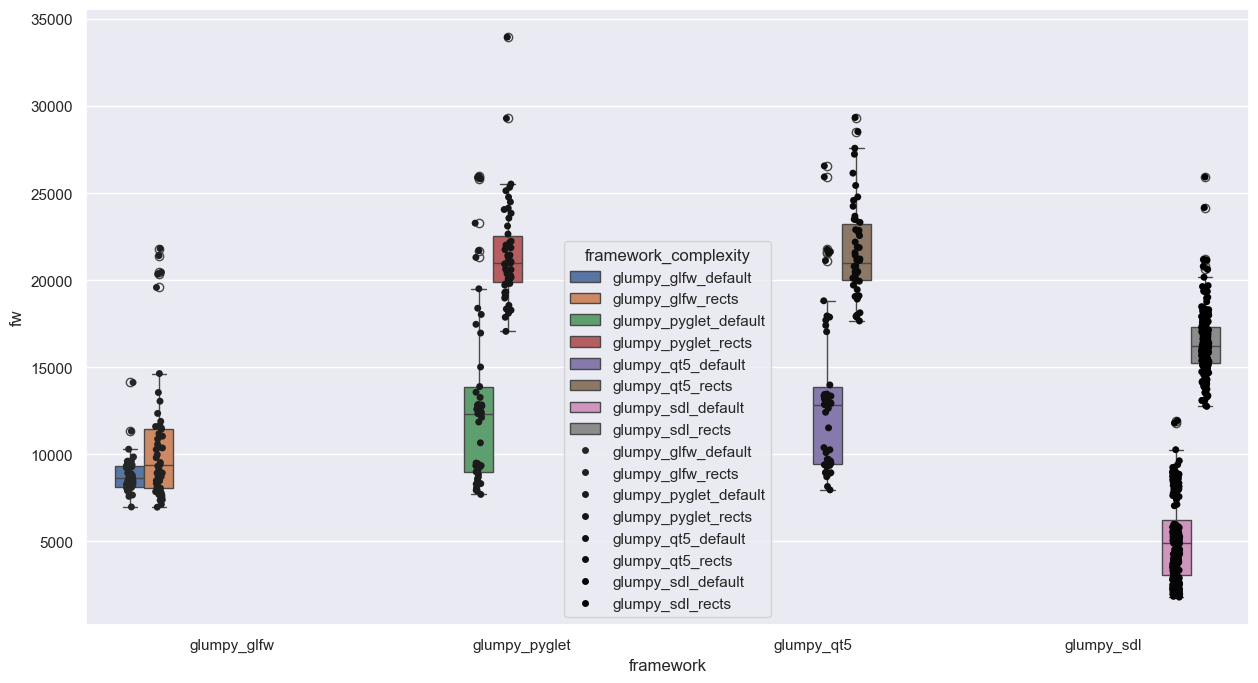

In [11]:
sns.boxplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='framework_complexity', dodge=True).set_title('')
sns.stripplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='framework_complexity', dodge=True, color=(0,0,0))

C:\Users\tina\AppData\Local\Temp\ipykernel_3256\1861968181.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='program', dodge=True, color='black')


<Axes: xlabel='framework', ylabel='fw'>

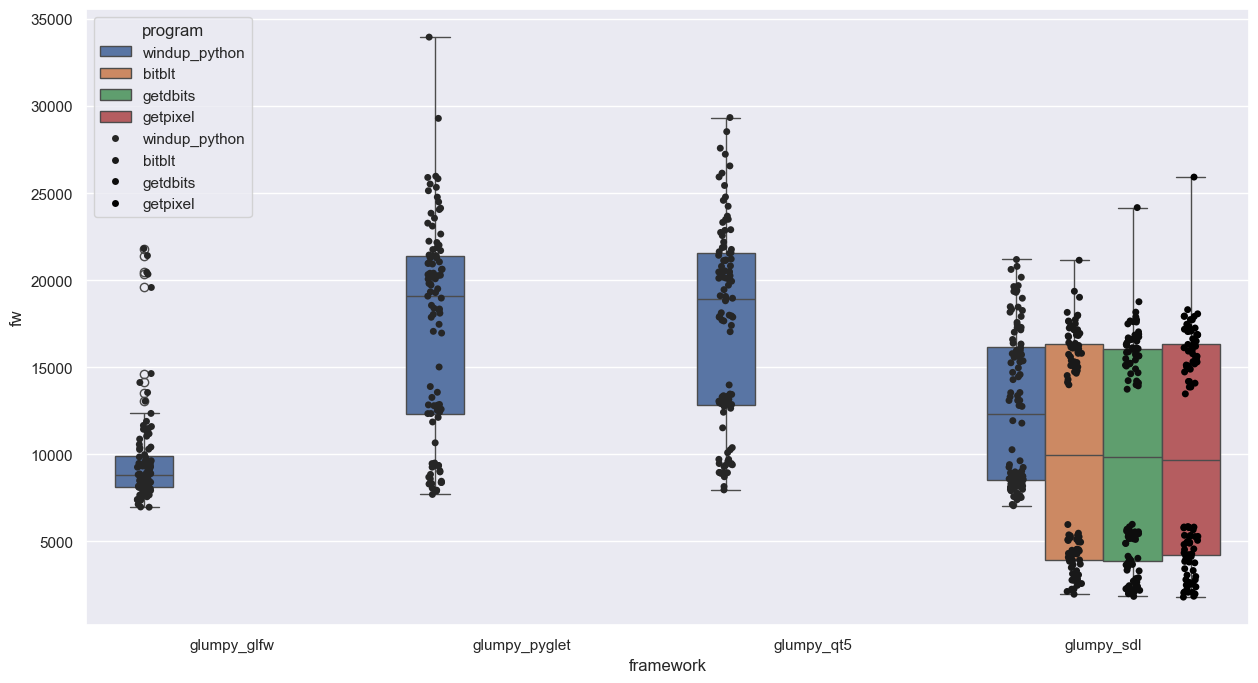

In [12]:
sns.boxplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='program', dodge=True, color='black')

## Difference (ete and fw) by program
### Complexity: Rects

C:\Users\tina\AppData\Local\Temp\ipykernel_3256\902970262.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'rects'))], x='framework', y='diff', hue='program', dodge=True, color='black')


<Axes: xlabel='framework', ylabel='diff'>

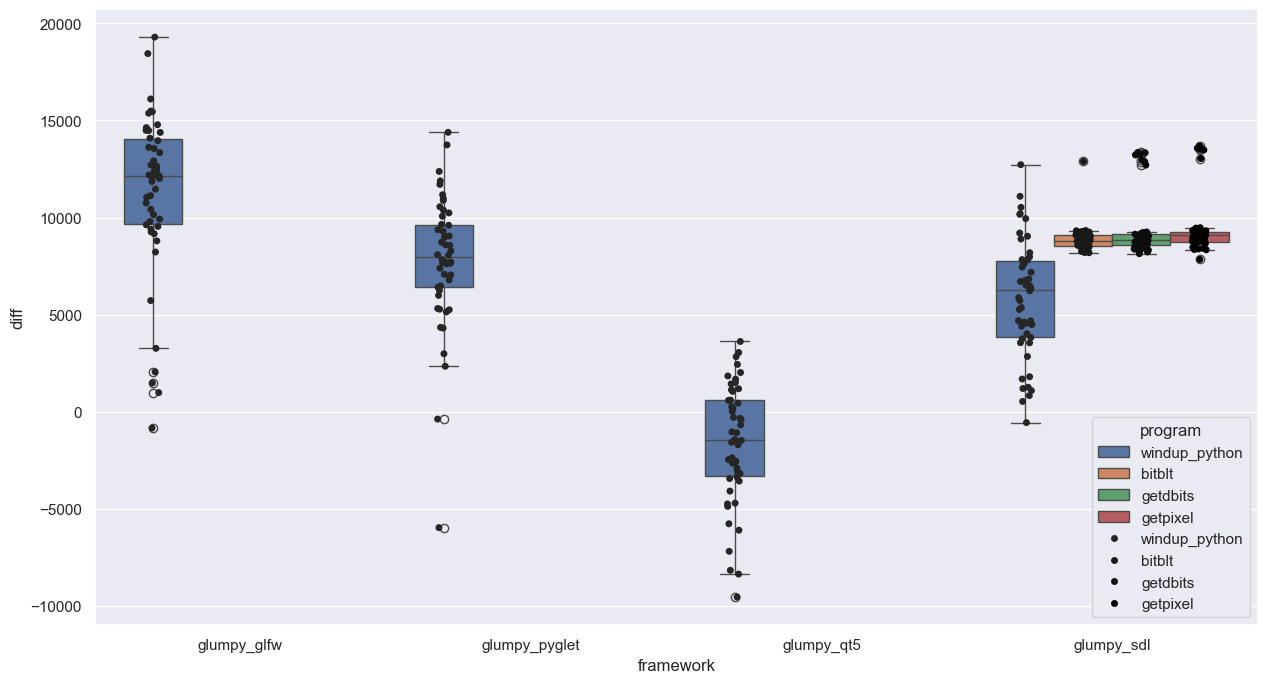

In [13]:
sns.boxplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'rects'))], x='framework', y='diff', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'rects'))], x='framework', y='diff', hue='program', dodge=True, color='black')


### Complexity: Default

C:\Users\tina\AppData\Local\Temp\ipykernel_3256\4192689939.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'default'))], x='framework', y='diff', hue='program', dodge=True, color='black')


(-20000.0, 30000.0)

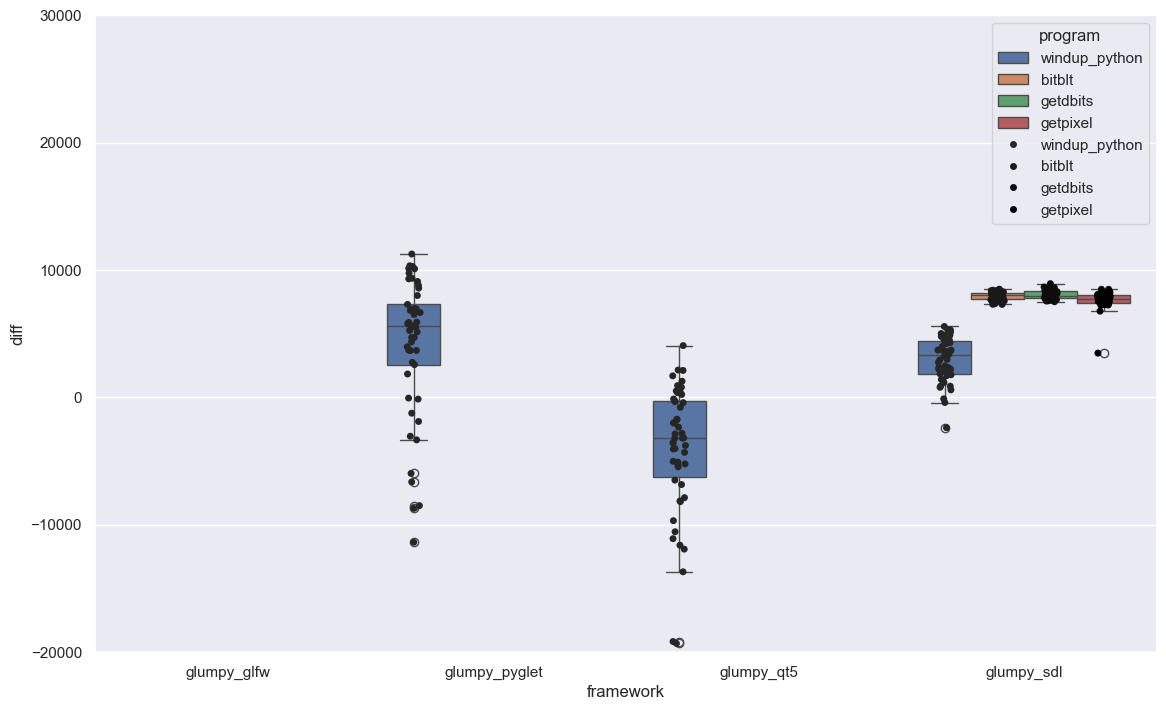

: 

In [23]:
sns.set(rc={'figure.figsize':(13.7,8.27)})
sns.boxplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'default'))], x='framework', y='diff', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'default'))], x='framework', y='diff', hue='program', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-20000, 30000)

<Axes: xlabel='framework', ylabel='diff'>

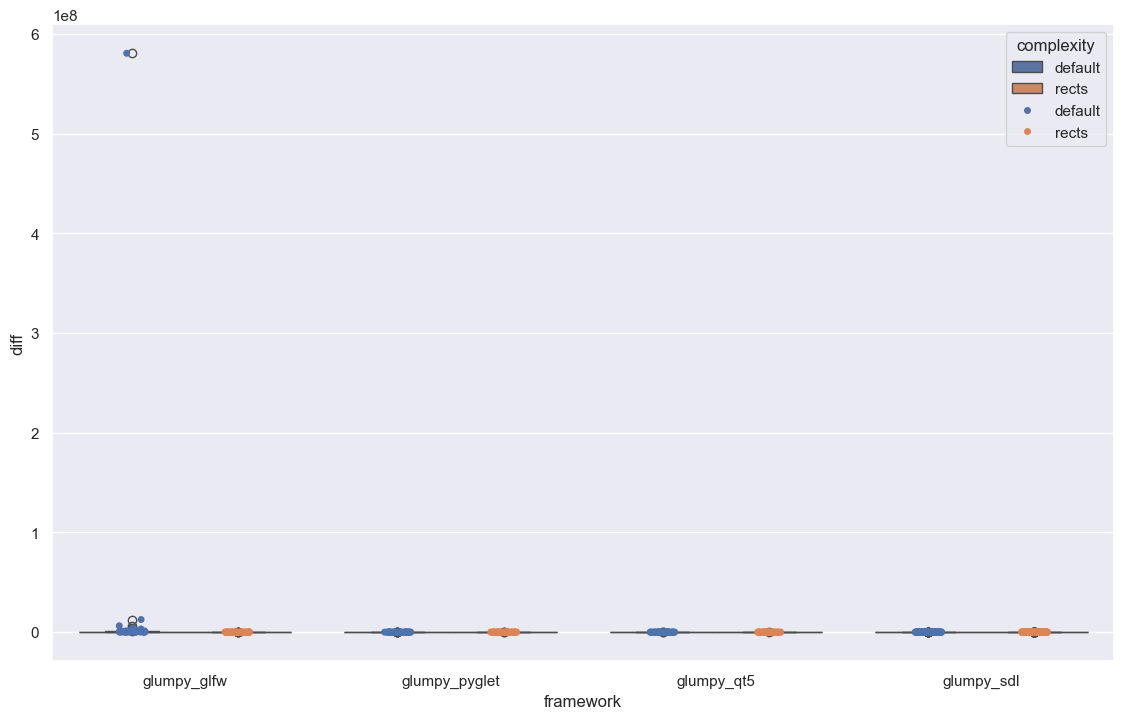

In [15]:
sns.boxplot(data=data[(data['fw_running'] == True)], x='framework', y='diff', hue='complexity', dodge=True).set_title('')
sns.stripplot(data=data[(data['fw_running'] == True)], x='framework', y='diff', hue='complexity', dodge=True)